In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/digit-recognizer/train.csv')
display(df.head())

# one-hot encording with pandas
t_data = df[['label']].copy()
t_data = pd.get_dummies(t_data, columns=['label'])
display(t_data.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


[pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=dummy) : Pandas를 이용한 one-hot encording

In [4]:
# Training, test data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop(columns='label', inplace=False), t_data,
                 test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [5]:
# Model
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_data_train_norm, t_data_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 1.9846 - accuracy: 0.2896 - val_loss: 1.2982 - val_accuracy: 0.6539
Epoch 2/100
735/735 [==============================] - 1s 983us/step - loss: 1.2533 - accuracy: 0.5755 - val_loss: 0.6683 - val_accuracy: 0.8318
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 0.8894 - accuracy: 0.7080 - val_loss: 0.4733 - val_accuracy: 0.8779
Epoch 4/100
735/735 [==============================] - 1s 983us/step - loss: 0.7181 - accuracy: 0.7730 - val_loss: 0.3950 - val_accuracy: 0.8935
Epoch 5/100
735/735 [==============================] - 1s 912us/step - loss: 0.6212 - accuracy: 0.8049 - val_loss: 0.3534 - val_accuracy: 0.9036
Epoch 6/100
735/735 [==============================] - 1s 931us/step - loss: 0.5644 - accuracy: 0.8316 - val_loss: 0.3147 - val_accuracy: 0.9148
Epoch 7/100
735/735 [==============================] - 1s 937us/step - loss: 0.4950 - accuracy: 0.8525 - val_loss: 0.2961 - val_accura

Epoch 57/100
735/735 [==============================] - 1s 929us/step - loss: 0.0970 - accuracy: 0.9719 - val_loss: 0.1846 - val_accuracy: 0.9641
Epoch 58/100
735/735 [==============================] - 1s 891us/step - loss: 0.0950 - accuracy: 0.9740 - val_loss: 0.1832 - val_accuracy: 0.9651
Epoch 59/100
735/735 [==============================] - 1s 933us/step - loss: 0.0942 - accuracy: 0.9745 - val_loss: 0.1880 - val_accuracy: 0.9667
Epoch 60/100
735/735 [==============================] - 1s 890us/step - loss: 0.0916 - accuracy: 0.9741 - val_loss: 0.1862 - val_accuracy: 0.9638
Epoch 61/100
735/735 [==============================] - 1s 909us/step - loss: 0.0946 - accuracy: 0.9733 - val_loss: 0.1894 - val_accuracy: 0.9641
Epoch 62/100
735/735 [==============================] - 1s 927us/step - loss: 0.0954 - accuracy: 0.9734 - val_loss: 0.1926 - val_accuracy: 0.9653
Epoch 63/100
735/735 [==============================] - 1s 1000us/step - loss: 0.0894 - accuracy: 0.9754 - val_loss: 0.1879 

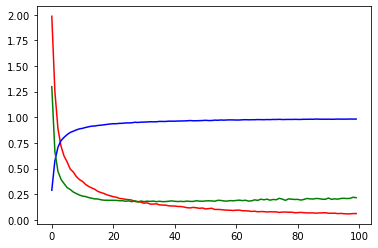

In [17]:
# 학습결과 확인
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_loss'], color='g')
plt.show()

In [7]:
# 예측
print(model.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 516us/step - loss: 0.1934 - accuracy: 0.9694
[0.1934092938899994, 0.9694444537162781]


## Model 2 with Adam optimizer

In [8]:
# Model
model2 = Sequential()
model2.add(Flatten(input_shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_data_train_norm, t_data_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 0.8115 - accuracy: 0.7457 - val_loss: 0.4175 - val_accuracy: 0.8981
Epoch 2/100
735/735 [==============================] - 1s 969us/step - loss: 0.5228 - accuracy: 0.8614 - val_loss: 0.3082 - val_accuracy: 0.9276
Epoch 3/100
735/735 [==============================] - 1s 983us/step - loss: 0.4584 - accuracy: 0.8769 - val_loss: 0.3032 - val_accuracy: 0.9287
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.8925 - val_loss: 0.3250 - val_accuracy: 0.9291
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8857 - val_loss: 0.2768 - val_accuracy: 0.9371
Epoch 6/100
735/735 [==============================] - 1s 994us/step - loss: 0.3989 - accuracy: 0.8967 - val_loss: 0.3032 - val_accuracy: 0.9386
Epoch 7/100
735/735 [==============================] - 1s 990us/step - loss: 0.4132 - accuracy: 0.8935 - val_loss: 0.2940 - val_accuracy

735/735 [==============================] - 1s 979us/step - loss: 0.3947 - accuracy: 0.9023 - val_loss: 0.3690 - val_accuracy: 0.9437
Epoch 58/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3930 - accuracy: 0.9013 - val_loss: 0.4588 - val_accuracy: 0.9413
Epoch 59/100
735/735 [==============================] - 1s 987us/step - loss: 0.3990 - accuracy: 0.8976 - val_loss: 0.4399 - val_accuracy: 0.9427
Epoch 60/100
735/735 [==============================] - 1s 971us/step - loss: 0.4047 - accuracy: 0.9011 - val_loss: 0.4132 - val_accuracy: 0.9364
Epoch 61/100
735/735 [==============================] - 1s 982us/step - loss: 0.4421 - accuracy: 0.8904 - val_loss: 0.3656 - val_accuracy: 0.9459
Epoch 62/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3783 - accuracy: 0.9026 - val_loss: 0.4669 - val_accuracy: 0.9415
Epoch 63/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8969 - val_loss: 0.3923 - val_accuracy: 0.93

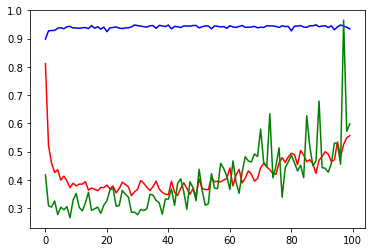

In [14]:
# 학습결과 확인
plt.plot(history2.history['loss'], color='r')
plt.plot(history2.history['val_accuracy'], color='b')
plt.plot(history2.history['val_loss'], color='g')
plt.show()

In [16]:
# 예측
print(model2.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 516us/step - loss: 0.4964 - accuracy: 0.9397
[0.4963889420032501, 0.9396825432777405]
